<a href="https://colab.research.google.com/github/sbarreto10/data-science-2022/blob/main/PRACTICA/SALES-ANALYSIS-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [163]:
from datetime import datetime

def hour_to_int(hourStr):
    hourObj = datetime.strptime(hourStr, '%H:%M')
    return hourObj.hour * 60 + hourObj.minute

def numeric_to_hour(hourNum):
    minutes = round(hourNum)
    hours, minutes = divmod(minutes, 60)
    hourObj = datetime(1, 1, 1, hours, minutes)
    return hourObj.strftime('%H:%M')

In [140]:
months = ["January", "February", "March", "April", "June", "July", "August", "September", "October", "November", "December"]
salesDf = pd.concat([pd.read_csv("/content/drive/MyDrive/sales-1/Sales_"+month+"_2019.csv") for month in months])

In [141]:
print("original: "+str(salesDf.shape))
salesDf = salesDf.dropna()
print("sin Nan: "+str(salesDf.shape))
salesDf = salesDf[salesDf["Order ID"]!="Order ID"]
print("sin filas de relleno: "+str(salesDf.shape))
print("Limpio ✅")

original: (170215, 6)
sin Nan: (169718, 6)
sin filas de relleno: (169396, 6)
Limpio ✅


In [143]:
salesDf = salesDf.sort_values("Order Date")
salesDf[["Order Date Day","Order Date Hour"]] = salesDf["Order Date"].str.split(" ", expand=True)
salesDf["Order Date Hour Num"] = salesDf["Order Date Hour"].apply(hour_to_int)
salesDf = salesDf.drop(columns="Order Date")

In [144]:
salesDf["Income"] = pd.to_numeric(salesDf["Quantity Ordered"], errors='coerce')*pd.to_numeric(salesDf["Price Each"], errors='coerce')

In [145]:
salesDf

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date Day,Order Date Hour,Order Date Hour Num,Income
6344,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",01/01/19,03:07,187,11.99
7154,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",01/01/19,03:40,220,11.95
8507,149343,Apple Airpods Headphones,1,150,"735 5th St, New York City, NY 10001",01/01/19,04:56,296,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",01/01/19,05:53,353,2.99
8514,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",01/01/19,06:03,363,23.90
...,...,...,...,...,...,...,...,...,...
2870,298406,AAA Batteries (4-pack),2,2.99,"30 Elm St, San Francisco, CA 94016",12/31/19,23:42,1422,5.98
1914,297481,AA Batteries (4-pack),1,3.84,"82 Hill St, Dallas, TX 75001",12/31/19,23:42,1422,3.84
22387,317048,AAA Batteries (4-pack),2,2.99,"743 Adams St, San Francisco, CA 94016",12/31/19,23:45,1425,5.98
14778,309773,AAA Batteries (4-pack),1,2.99,"60 Hickory St, Los Angeles, CA 90001",12/31/19,23:52,1432,2.99


In [146]:
dailyIncome = salesDf.groupby(["Order Date Day"]).sum()["Income"];

<ipython-input-146-4e1362395c6e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dailyIncome = salesDf.groupby(["Order Date Day"]).sum()["Income"];


In [168]:
meanHour = salesDf.groupby(["Order Date Day"]).mean()["Order Date Hour Num"].apply(numeric_to_hour);

<ipython-input-168-c1bedd63d0e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanHour = salesDf.groupby(["Order Date Day"]).mean()["Order Date Hour Num"].apply(numeric_to_hour);


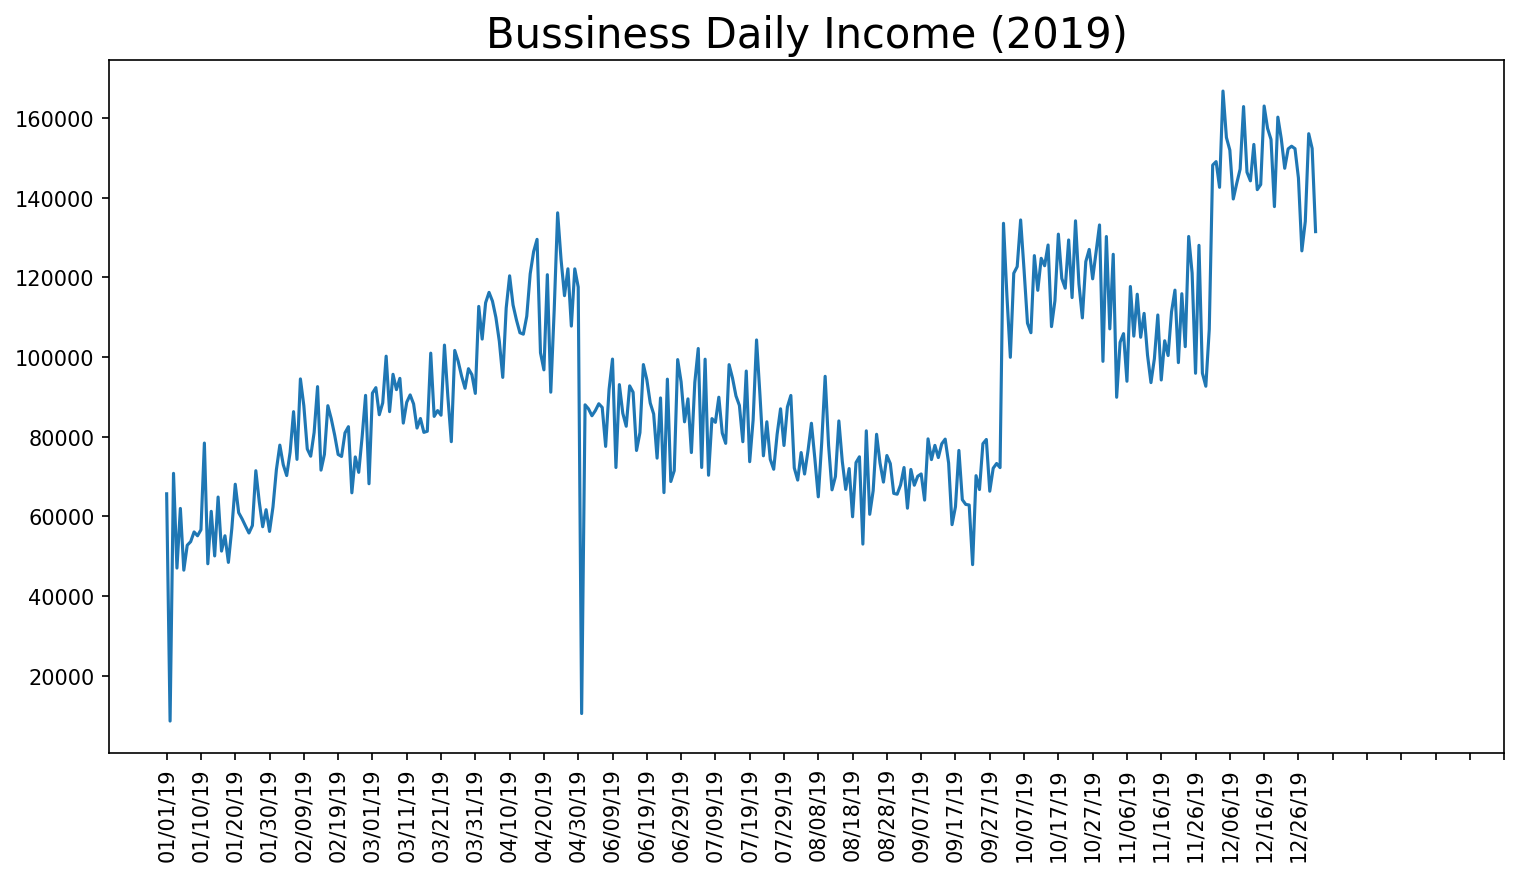

In [171]:
plt.figure(dpi=150, figsize=(12,6))
plt.plot(dailyIncome)
plt.title("Bussiness Daily Income (2019)", fontsize=20)
plt.xticks([n for n in range(0,400,10)], rotation=90);

Text(40, 30, 'RARI')

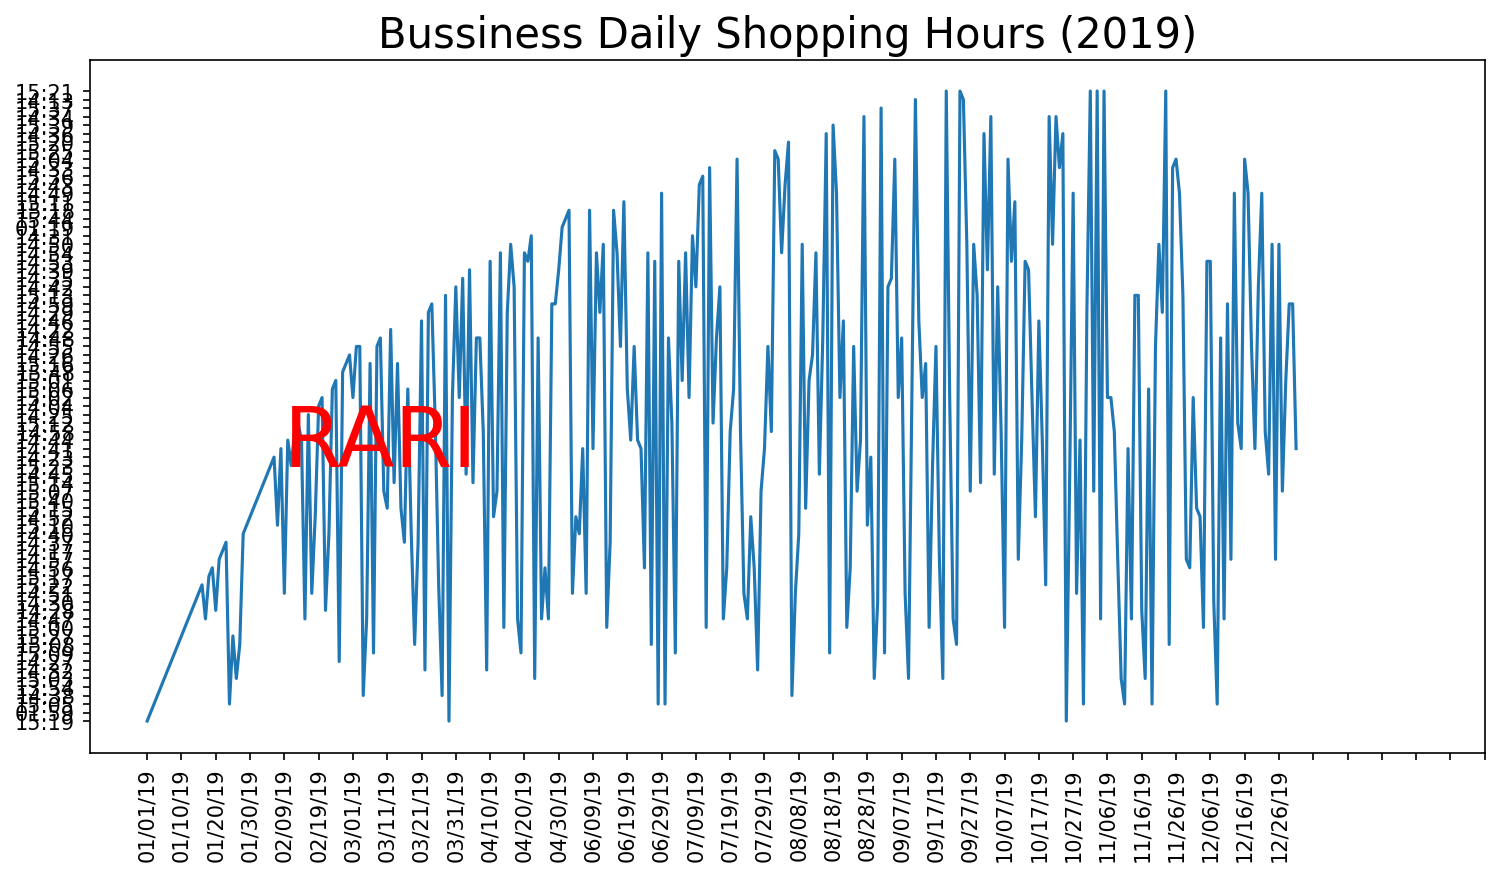

In [176]:
plt.figure(dpi=150, figsize=(12,6))
plt.plot(meanHour)
plt.title("Bussiness Daily Shopping Hours (2019)", fontsize=20)
plt.xticks([n for n in range(0,400,10)], rotation=90);
plt.text(x=40,y=30,s="RARI", fontsize=40, color="red")